In [35]:
import causaldag as cd
import os
import numpy as np
import sys
import matplotlib.pyplot as plt

In [3]:
BATCHES = 10
NBOOT = 100
NNODES = 50

True


In [4]:
# obtain true dag
gdag = np.recfromcsv("./genenet/network.csv")
amat = np.zeros([NNODES, NNODES])
for (i,j) in gdag:
    amat[i,j]=1
print(amat)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [22]:
# obtain true descendants

def get_descendants(amat, idx, it=0):
    if it > 50:
        return set()
    else:
        descendants = set(list(np.nonzero(amat[idx,:])[0]))
        for d in descendants:
            descendants = descendants | get_descendants(amat,d, it+1)
        return descendants
    
all_descendants = {}
for i in range(NNODES):
    all_descendants[i]=np.array([j in get_descendants(amat, i) for j in range(NNODES)])
    print(i,sum(all_descendants[i]))

0 0
1 9
2 0
3 0
4 0
5 0
6 48
7 0
8 0
9 0
10 0
11 0
12 0
13 48
14 0
15 0
16 0
17 0
18 0
19 0
20 0
21 0
22 0
23 6
24 0
25 0
26 0
27 0
28 0
29 0
30 0
31 0
32 2
33 2
34 0
35 0
36 0
37 0
38 0
39 0
40 0
41 0
42 0
43 0
44 0
45 0
46 0
47 4
48 0
49 0


In [6]:
# get results
FOLDER = "./genenet/entropy,t=1,n=1000,b=10,k=1/"
dag_collection = {}
for i in range(BATCHES):
    dag_collection[i] = [cd.GaussDAG.from_amat(np.load(os.path.join(FOLDER, 'dags_batch=%s' %i, 'dag%s.npy' %j))) for j in range(NBOOT)]
print(dag_collection[0][0])


[46][45][29][22][20][13][12][10][8][4][0][23|0][27|0,8,23][28|27,46][18|20,23][35|18,28,4][41|35,4,23][11|41,20][7|11,13,23][21|12,45,7][2|41,21][24|8,2,11][3|2,28,4,22][1|2,4,45][36|1,3,11,24,27][49|24,0,18,29][30|2,3,46,49,21,24,27][17|8,11,28,30][47|17,4,46][48|27,13,47][26|0,1,4,8,48][42|10,26,4,21][44|8,12,47,23][38|24,35,28,44][34|1,4,8,42,44,45,48,21,23,24][6|35,11,47,48,28,30][25|34,41,10,12,49][33|0,6,38,42,10,47,18,21,25,26,29][43|33,35,20,44][5|6,43,23,26,29][14|26,43,5][16|2,6,42,43,46,20,21,25,26,27][32|33,6,42,45,14,17][39|32,36,29,23][19|32,1,34,2,36,5,6,41,10,43,12,14,16,17,21,22,23,24,25][9|0,1,2,3,39,8,41,42,45,14,49,18,19,29][15|32,0,4,8,9,48,49,19,25,29][40|32,2,3,7,8,12,13,44,47,48,28,29,30][31|0,33,38,40,41,9,48,17,18,22,23][37|38,40,8,13,49,25]


In [19]:
def avg_downstream(dag_list, idx):
    def count_downstream(dag, idx):
        downstream = dag.downstream(idx)
        dlist = [i in downstream for i in range(NNODES)]
        return np.array(dlist).astype(int)
    counts = np.zeros(NNODES,)
    for dag in dag_list:
        counts += count_downstream(dag, idx)
    return counts/len(dag_list)

downstream_of_1 = []
for i in range(BATCHES):
    downstream_of_1.append(avg_downstream(dag_collection[i],1))

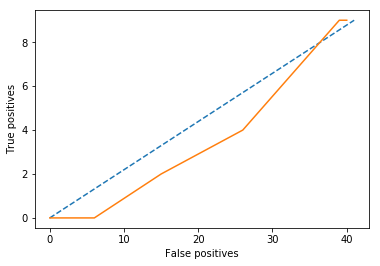

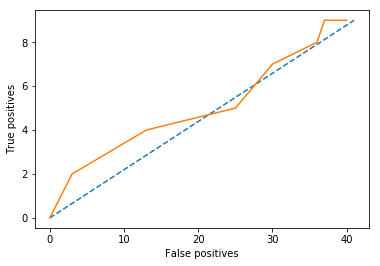

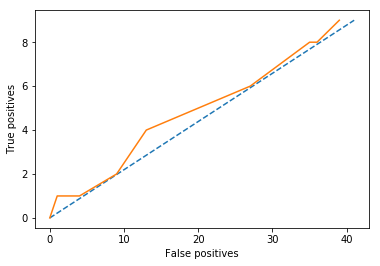

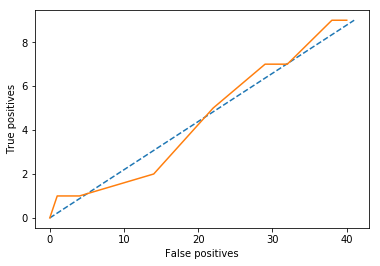

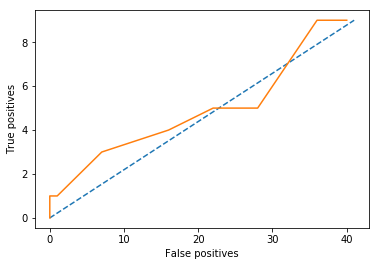

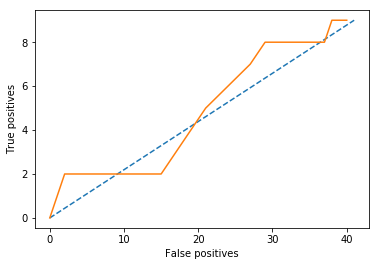

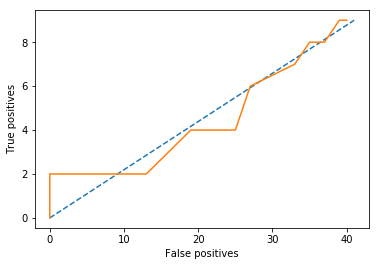

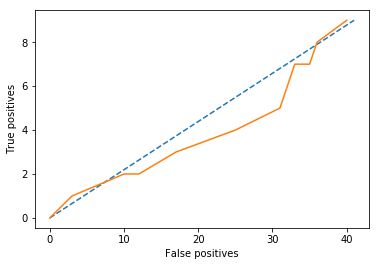

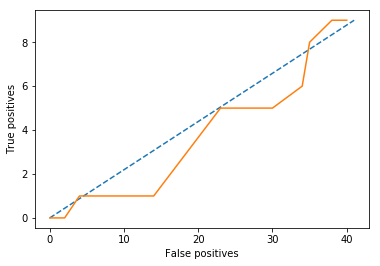

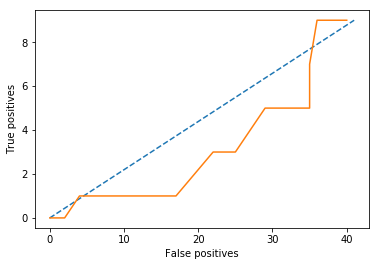

In [54]:
def plot_roc(probabilities, ground_truth):
    thresholds = np.linspace(1,0,20)
    truepos = []
    falsepos = []
    for th in thresholds:
        positives = probabilities>th
        truepos.append(sum(positives & (positives==ground_truth)))
        falsepos.append(sum(positives & (positives!=ground_truth)))
    truepos = np.array(truepos)
    falsepos = np.array(falsepos)
    random_prob = sum(ground_truth)/sum(1-ground_truth)
    lim = sum(1-ground_truth)
    plt.figure()
    plt.plot(np.linspace(0,lim,lim+1),np.linspace(0,lim,lim+1)*random_prob, '--')
    plt.plot(falsepos, truepos, '-')
    plt.xlabel("False positives")
    plt.ylabel("True positives")

for i in range(BATCHES):
    plot_roc(downstream_of_1[i], all_descendants[1])


        